<a href="https://colab.research.google.com/github/bsureshkrishna/qlsc600_2023/blob/main/ecg_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

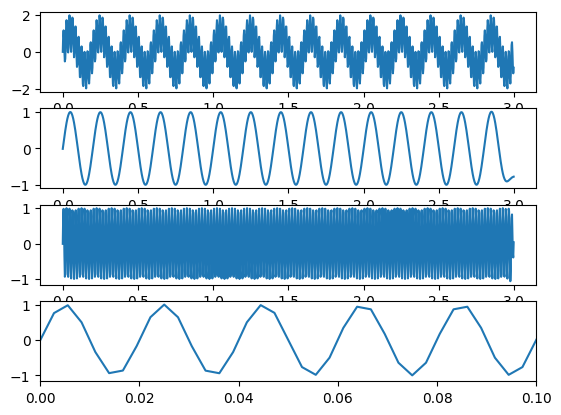

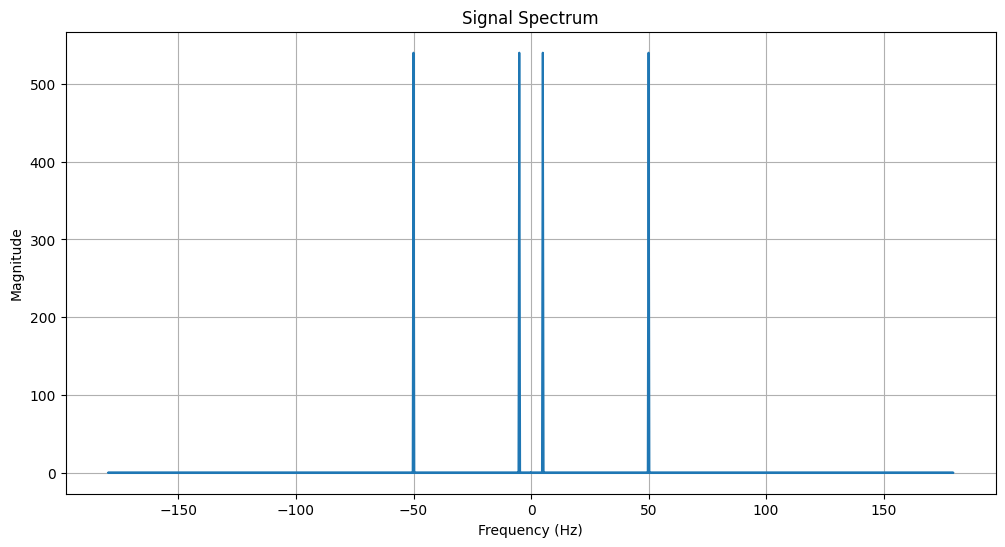

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

sample_rate = 360

def mybandpass_filter(signal, lowcut, highcut, fs):
  #fs is sampling freqency, lowcut, highcut are lower cutoff and higher cutoff frequencies

    # Design a Butterworth bandpass filter
    nyquist = 0.5 * fs #fs is sampling freqency
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(N=2, Wn=[low, high], btype='band')

    # Apply the filter
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

def mylowpass_filter(signal, cutoff, fs, order=5):
  #signal, cutoff, fs, order=5
  #signal is signal to be filtered, cutoff is the upper cutoff frequency, fs is sampling-frequency and order is steepness of filter rolloff
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

def plot_signal_spectrum(signal, fs):
    # Compute the FFT
    fft_result = np.fft.fft(signal-np.mean(signal))

    # Compute the frequency bins
    freqs = np.fft.fftfreq(len(signal), d=1/fs)

    # Compute the magnitude (absolute value of the FFT)
    magnitude = np.abs(fft_result)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(freqs, magnitude)
    plt.title("Signal Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.show()

#example of usage - ask tas for help if needed
fs=360
timeaxis=np.arange(0,3,step=1/fs)
signal=np.sin(2.0*np.pi*5*timeaxis) + np.sin(2.0*np.pi*50*timeaxis)

recovered1=mylowpass_filter(signal,10,fs)
recovered2=mybandpass_filter(signal,30,80,fs)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)

ax1.plot(timeaxis,signal)
ax2.plot(timeaxis,recovered1)
ax3.plot(timeaxis,recovered2)
ax4.plot(timeaxis,recovered2)
plt.xlim(0,0.1)

plot_signal_spectrum(signal, sample_rate)